In [3]:
# imports

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [5]:
from keras import models
import os
from keras import layers 

In [4]:
from distutils.dir_util import copy_tree
toDir = "AllTrain"
fromdir = "C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle"
copy_tree(fromdir ,toDir)
fromdirNon = "C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_can"
copy_tree(fromdirNon ,toDir)

['AllTrain\\beer35.jpg',
 'AllTrain\\beer37.jpg',
 'AllTrain\\birra3.jpg',
 'AllTrain\\IPA78.jpg',
 'AllTrain\\olut12.jpg',
 'AllTrain\\olut19.jpg',
 'AllTrain\\olut2.jpg',
 'AllTrain\\olut31.jpg',
 'AllTrain\\olut47.jpg',
 'AllTrain\\olut72.jpg',
 'AllTrain\\olut81.jpg',
 'AllTrain\\olut99.jpg',
 'AllTrain\\sör1.jpg',
 'AllTrain\\sör12.jpg',
 'AllTrain\\sör14.jpg',
 'AllTrain\\sör17.jpg',
 'AllTrain\\sör31.jpg',
 'AllTrain\\sör37.jpg',
 'AllTrain\\sör40.jpg',
 'AllTrain\\sör5.jpg',
 'AllTrain\\sör55.jpg',
 'AllTrain\\sör59.jpg',
 'AllTrain\\sör78.jpg',
 'AllTrain\\sör8.jpg',
 'AllTrain\\пиво30.jpg']

In [5]:
toDir1 = "AllTest"
fromdir1 = "C:/Users/kapor/Deep_Learning_in_Vision/validation/beer_bottle_test"
copy_tree(fromdir1 ,toDir1)
fromdirNon1 = "C:/Users/kapor/Deep_Learning_in_Vision/validation/beer_can_test"
copy_tree(fromdirNon1,toDir1)

['AllTest\\craft beer21.jpg',
 'AllTest\\IPA75.jpg',
 'AllTest\\olut15.jpg',
 'AllTest\\olut19.jpg',
 'AllTest\\olut2.jpg',
 'AllTest\\olut31.jpg',
 'AllTest\\olut62.jpg',
 'AllTest\\olut77.jpg',
 'AllTest\\olut99.jpg',
 'AllTest\\sör70.jpg',
 'AllTest\\sör91.jpg',
 'AllTest\\sör98.jpg']

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
filenames = []
categories = []
Train_bottle = os.listdir("C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle")
for filename in Train_bottle :
        categories.append(1)
filenames.extend(Train_bottle)

Train_can = os.listdir("C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_can")
for filename in Train_can :
        categories.append(0)
filenames.extend(Train_can)

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

train_df["category"] = train_df["category"].replace({0: 'can', 1: 'bottle'})

In [ ]:
train_df.head()

In [8]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, "AllTrain/", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)

Found 100 validated image filenames belonging to 2 classes.


In [9]:
filenames = []
categories = []
test_bottle = os.listdir("C:/Users/kapor/Deep_Learning_in_Vision/validation/beer_bottle_test")
for filename in test_bottle :
        categories.append(1)
filenames.extend(test_bottle )

test_can = os.listdir("C:/Users/kapor/Deep_Learning_in_Vision/validation/beer_can_test")
for filename in test_can :
        categories.append(0)
filenames.extend(test_can )

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

test_df["category"] = test_df["category"].replace({0: 'can', 1: 'bottle'})

In [ ]:
test_df.head()

In [10]:
validation_generator = test_datagen.flow_from_dataframe(
    test_df, "AllTest/", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)

Found 27 validated image filenames belonging to 2 classes.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import applications

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [20]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet', input_shape=(150,150,3))

model = models.Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
# name = 'cnn_face_2'

# tensorboard_2 = TensorBoard(
#         log_dir='./tensorboard/' + name + '/', 
#         write_graph=True,
#         histogram_freq=0)

In [24]:
epochs = 15
batch_size = 20
num_train_images = 262
num_valid_images = 84

history = model.fit(
        train_generator,
        steps_per_epoch=len(train_df) // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps= len(test_df) // batch_size)
        #callbacks=[tensorboard_2])

Epoch 1/15
5/5 [==============================] - 98s 23s/step - loss: 68088.9796 - accuracy: 0.4685 - val_loss: 0.9370 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 126s 25s/step - loss: 1.1029 - accuracy: 0.4982 - val_loss: 0.9386 - val_accuracy: 0.5500
Epoch 3/15
5/5 [==============================] - 137s 27s/step - loss: 0.6217 - accuracy: 0.6440 - val_loss: 0.7707 - val_accuracy: 0.5500
Epoch 4/15
5/5 [==============================] - 140s 29s/step - loss: 0.5871 - accuracy: 0.7431 - val_loss: 0.7169 - val_accuracy: 0.6000
Epoch 5/15
5/5 [==============================] - 144s 29s/step - loss: 0.5992 - accuracy: 0.7082 - val_loss: 0.9795 - val_accuracy: 0.5000
Epoch 6/15
5/5 [==============================] - 148s 30s/step - loss: 0.5976 - accuracy: 0.7396 - val_loss: 0.6646 - val_accuracy: 0.6000
Epoch 7/15
5/5 [==============================] - 134s 24s/step - loss: 0.4520 - accuracy: 0.8485 - val_loss: 3.9355 - val_accuracy: 0.4500
Epoch 8/15
5/5 [=

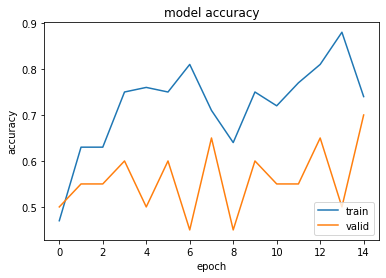

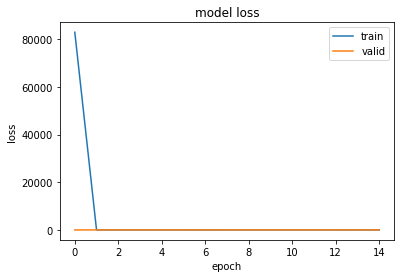

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [6]:
# parameters setup

imgs_path = "C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [7]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
files = [imgs_path + "/" + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 75


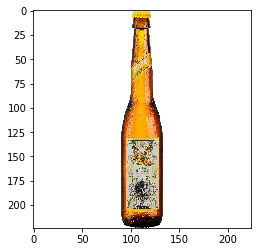

image loaded successfully!


In [13]:
# load an image in PIL format
original = load_img(files[6], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [14]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [15]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [17]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(75, 4096)

In [18]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer0.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer27.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer29.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer59.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer66.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer75.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer83.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer93.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/bier45.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/bier64.jpg,...,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/olut16.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/olut55.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/olut7.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/olut75.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/olut82.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/olut9.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/sör23.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/sör25.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/sör53.jpg,C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/пиво78.jpg
C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer0.jpg,1.000000,0.688520,0.672379,0.803770,0.798179,0.595771,0.638607,0.659310,0.754705,0.694708,...,0.458309,0.326241,0.239482,0.608223,0.568691,0.546266,0.623105,0.618736,0.377030,0.768103
C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer27.jpg,0.688520,1.000000,0.536991,0.727270,0.587638,0.473400,0.560156,0.558236,0.702592,0.644465,...,0.315782,0.300508,0.168884,0.608056,0.448933,0.467373,0.726424,0.729282,0.391501,0.738183
C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer29.jpg,0.672379,0.536991,1.000000,0.602477,0.732096,0.496471,0.546626,0.696371,0.713326,0.665395,...,0.343299,0.329732,0.283197,0.536603,0.605737,0.548696,0.461589,0.580608,0.328788,0.691730
C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer59.jpg,0.803770,0.727270,0.602477,1.000000,0.702089,0.540000,0.596654,0.622482,0.761160,0.662706,...,0.431623,0.345604,0.237076,0.650586,0.502377,0.555876,0.666525,0.655152,0.349336,0.827302
C:/Users/kapor/Deep_Learning_in_Vision/brandnew_images/train/beer_bottle/beer66.jpg,0.798179,0.587638,0.732096,0.702089,1.000000,0.601499,0.558947,0.654648,0.738759,0.812956,...,0.510378,0.270024,0.233401,0.537701,0.693348,0.506102,0.602985,0.659343,0.382208,0.711155


In [19]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


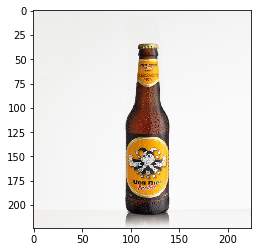

-----------------------------------------------------------------------
most similar products:


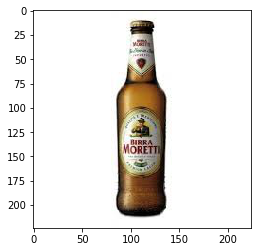

similarity score :  0.8496321


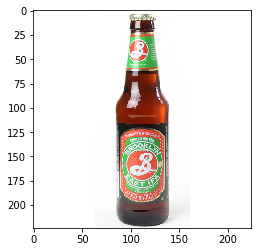

similarity score :  0.83390635


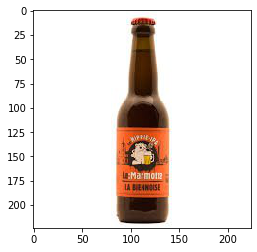

similarity score :  0.8279201


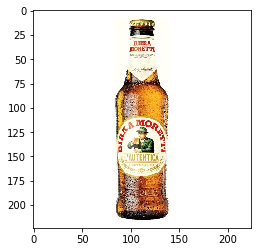

similarity score :  0.8250169


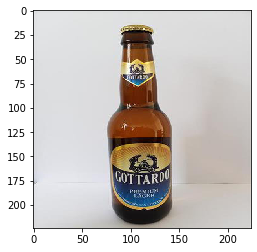

similarity score :  0.810558


In [23]:
retrieve_most_similar_products(files[10])